# Importing Libraries

In [166]:
!pip install scikit-plot

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler , scale
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing dataset through pd.read_csv function
data = pd.read_csv('xl.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Preprocessing

In [6]:
# Checking whether there are some missing values in our dataset or not
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Dropping the null values
new_data = data.dropna()

In [8]:
# After dropping null values we are only left with 480 datapoints
new_data.shape

(480, 13)

In [9]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data transformation type # 1 (Doing it manually)

In [11]:
#replcaing the Labels to 1 and 0 
again = new_data.replace({'Loan_Status': {'Y':1 , 'N':0}})

In [12]:
again['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [13]:
again['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
Loan_predicting_df = again.replace(to_replace='3+' , value = 4)

In [15]:
Loan_predicting_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [16]:
#replacing the categorical data into numerical manually
replaced_dataset = Loan_predicting_df.replace({'Gender' : {'Male' : 1 , 'Female' : 0} , 
                    'Married': {'Yes' :1 , 'No':0 } , 
                    'Self_Employed' : {'Yes' : 1 , 'No' : 0} , 
                    'Education'  : {'Graduate' : 1 , "Not Graduate" : 0} , 
                    'Property_Area' : {'Rural' : 0 , "Semiurban" : 1 , 'Urban' : 2} })

In [17]:
mydata = replaced_dataset.drop(columns = 'Loan_ID' , axis =1)

Correlating the data

In [18]:
#using corr( ) function to correlate the data
corrr = mydata.corr()

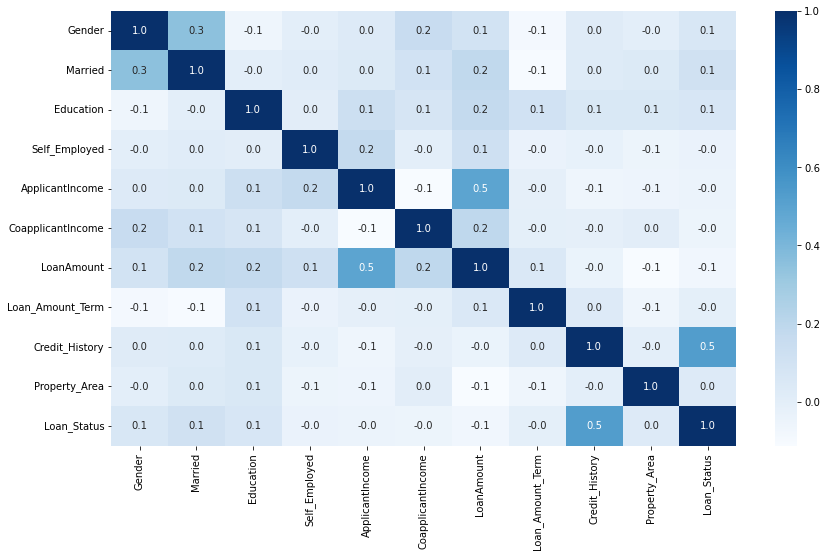

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(corrr , fmt=".1f" ,annot = True , cbar = True , cmap = 'Blues')
plt.show()

In [20]:
mydata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [152]:
classes = mydata['Loan_Status'].value_counts()

In [21]:
mylabels = mydata.columns

In [22]:
# In X we are droping the label from the dataset
# In target we are only taking the label'Loan_Status' attributes
X = mydata.drop(columns = 'Loan_Status' , axis = 1)
target = mydata['Loan_Status']

Data transformation type # 2 (Doing it through PCA)

In [23]:
pca = PCA()

In [24]:
pca_transformed_data = pca.fit_transform(X)

In [25]:
pca_transformed_data

array([[-7.74847022e+02, -1.24313578e+02,  1.46710211e+00, ...,
        -3.35581678e-02, -1.16934184e-01,  2.89521380e-02],
       [-2.25582952e+03, -1.73334891e+03, -3.07481084e+01, ...,
         1.69461527e-01,  8.75786398e-01, -3.13759975e-01],
       [-2.82633932e+03,  5.92584877e+02,  1.67763499e+00, ...,
        -2.78690507e-01, -6.17061632e-05,  2.14914866e-01],
       ...,
       [ 2.79064671e+03, -1.15968215e+03,  9.15414375e+01, ...,
        -1.36016712e-01, -1.27866476e-01,  6.77835231e-04],
       [ 2.31801183e+03, -1.43176853e+03,  4.14528513e+01, ...,
        -1.28583603e-01, -1.14350951e-01, -1.20274110e-02],
       [-6.75818698e+02, -1.62897545e+03,  1.50271855e+01, ...,
         1.00489653e+00,  7.18895485e-01, -2.43811051e-02]])

Data transformation type # 3 (Doing it through MinMaxScaler)

In [26]:
minmaxscalar= MinMaxScaler()

In [27]:
min_max_scalar_transformation_data = minmaxscalar.fit_transform(X)

In [28]:
min_max_scalar_transformation_data

array([[1.        , 1.        , 0.25      , ..., 0.72972973, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.72972973, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.25      , ..., 0.72972973, 1.        ,
        1.        ],
       [1.        , 1.        , 0.5       , ..., 0.72972973, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.72972973, 0.        ,
        0.5       ]])

Data transformation type # 4 (Doing it through Unit Vector Scaling)

In [29]:
unit_vector = scale(mydata)
unit_vector

array([[ 0.46719815,  0.73716237,  0.11235219, ...,  0.41319694,
        -1.31886834, -1.49774605],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.41319694,
         1.25977445,  0.66766993],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.41319694,
         1.25977445,  0.66766993],
       ...,
       [ 0.46719815,  0.73716237,  0.11235219, ...,  0.41319694,
         1.25977445,  0.66766993],
       [ 0.46719815,  0.73716237,  0.92945899, ...,  0.41319694,
         1.25977445,  0.66766993],
       [-2.14041943, -1.35655324, -0.70475462, ..., -2.42015348,
        -0.02954695, -1.49774605]])

C:\Users\saada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

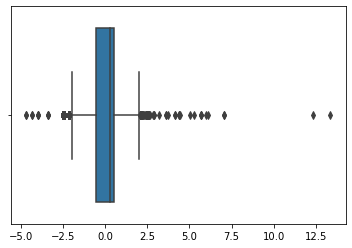

In [30]:
sns.boxplot(unit_vector)

<AxesSubplot:xlabel='Education', ylabel='count'>

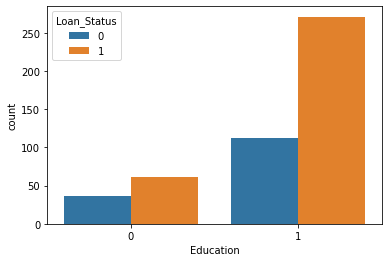

In [31]:
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = replaced_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

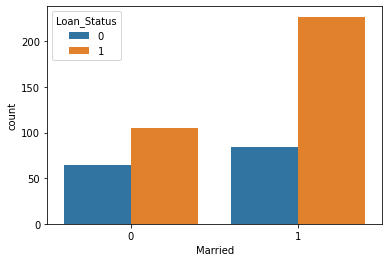

In [32]:
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = replaced_dataset)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

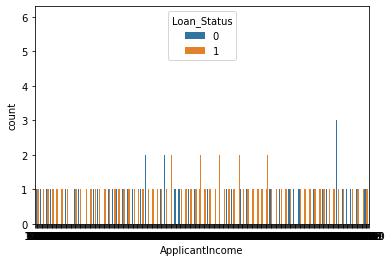

In [33]:
sns.countplot(x = 'ApplicantIncome' , hue = 'Loan_Status' , data = replaced_dataset)

In [34]:
replaced_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


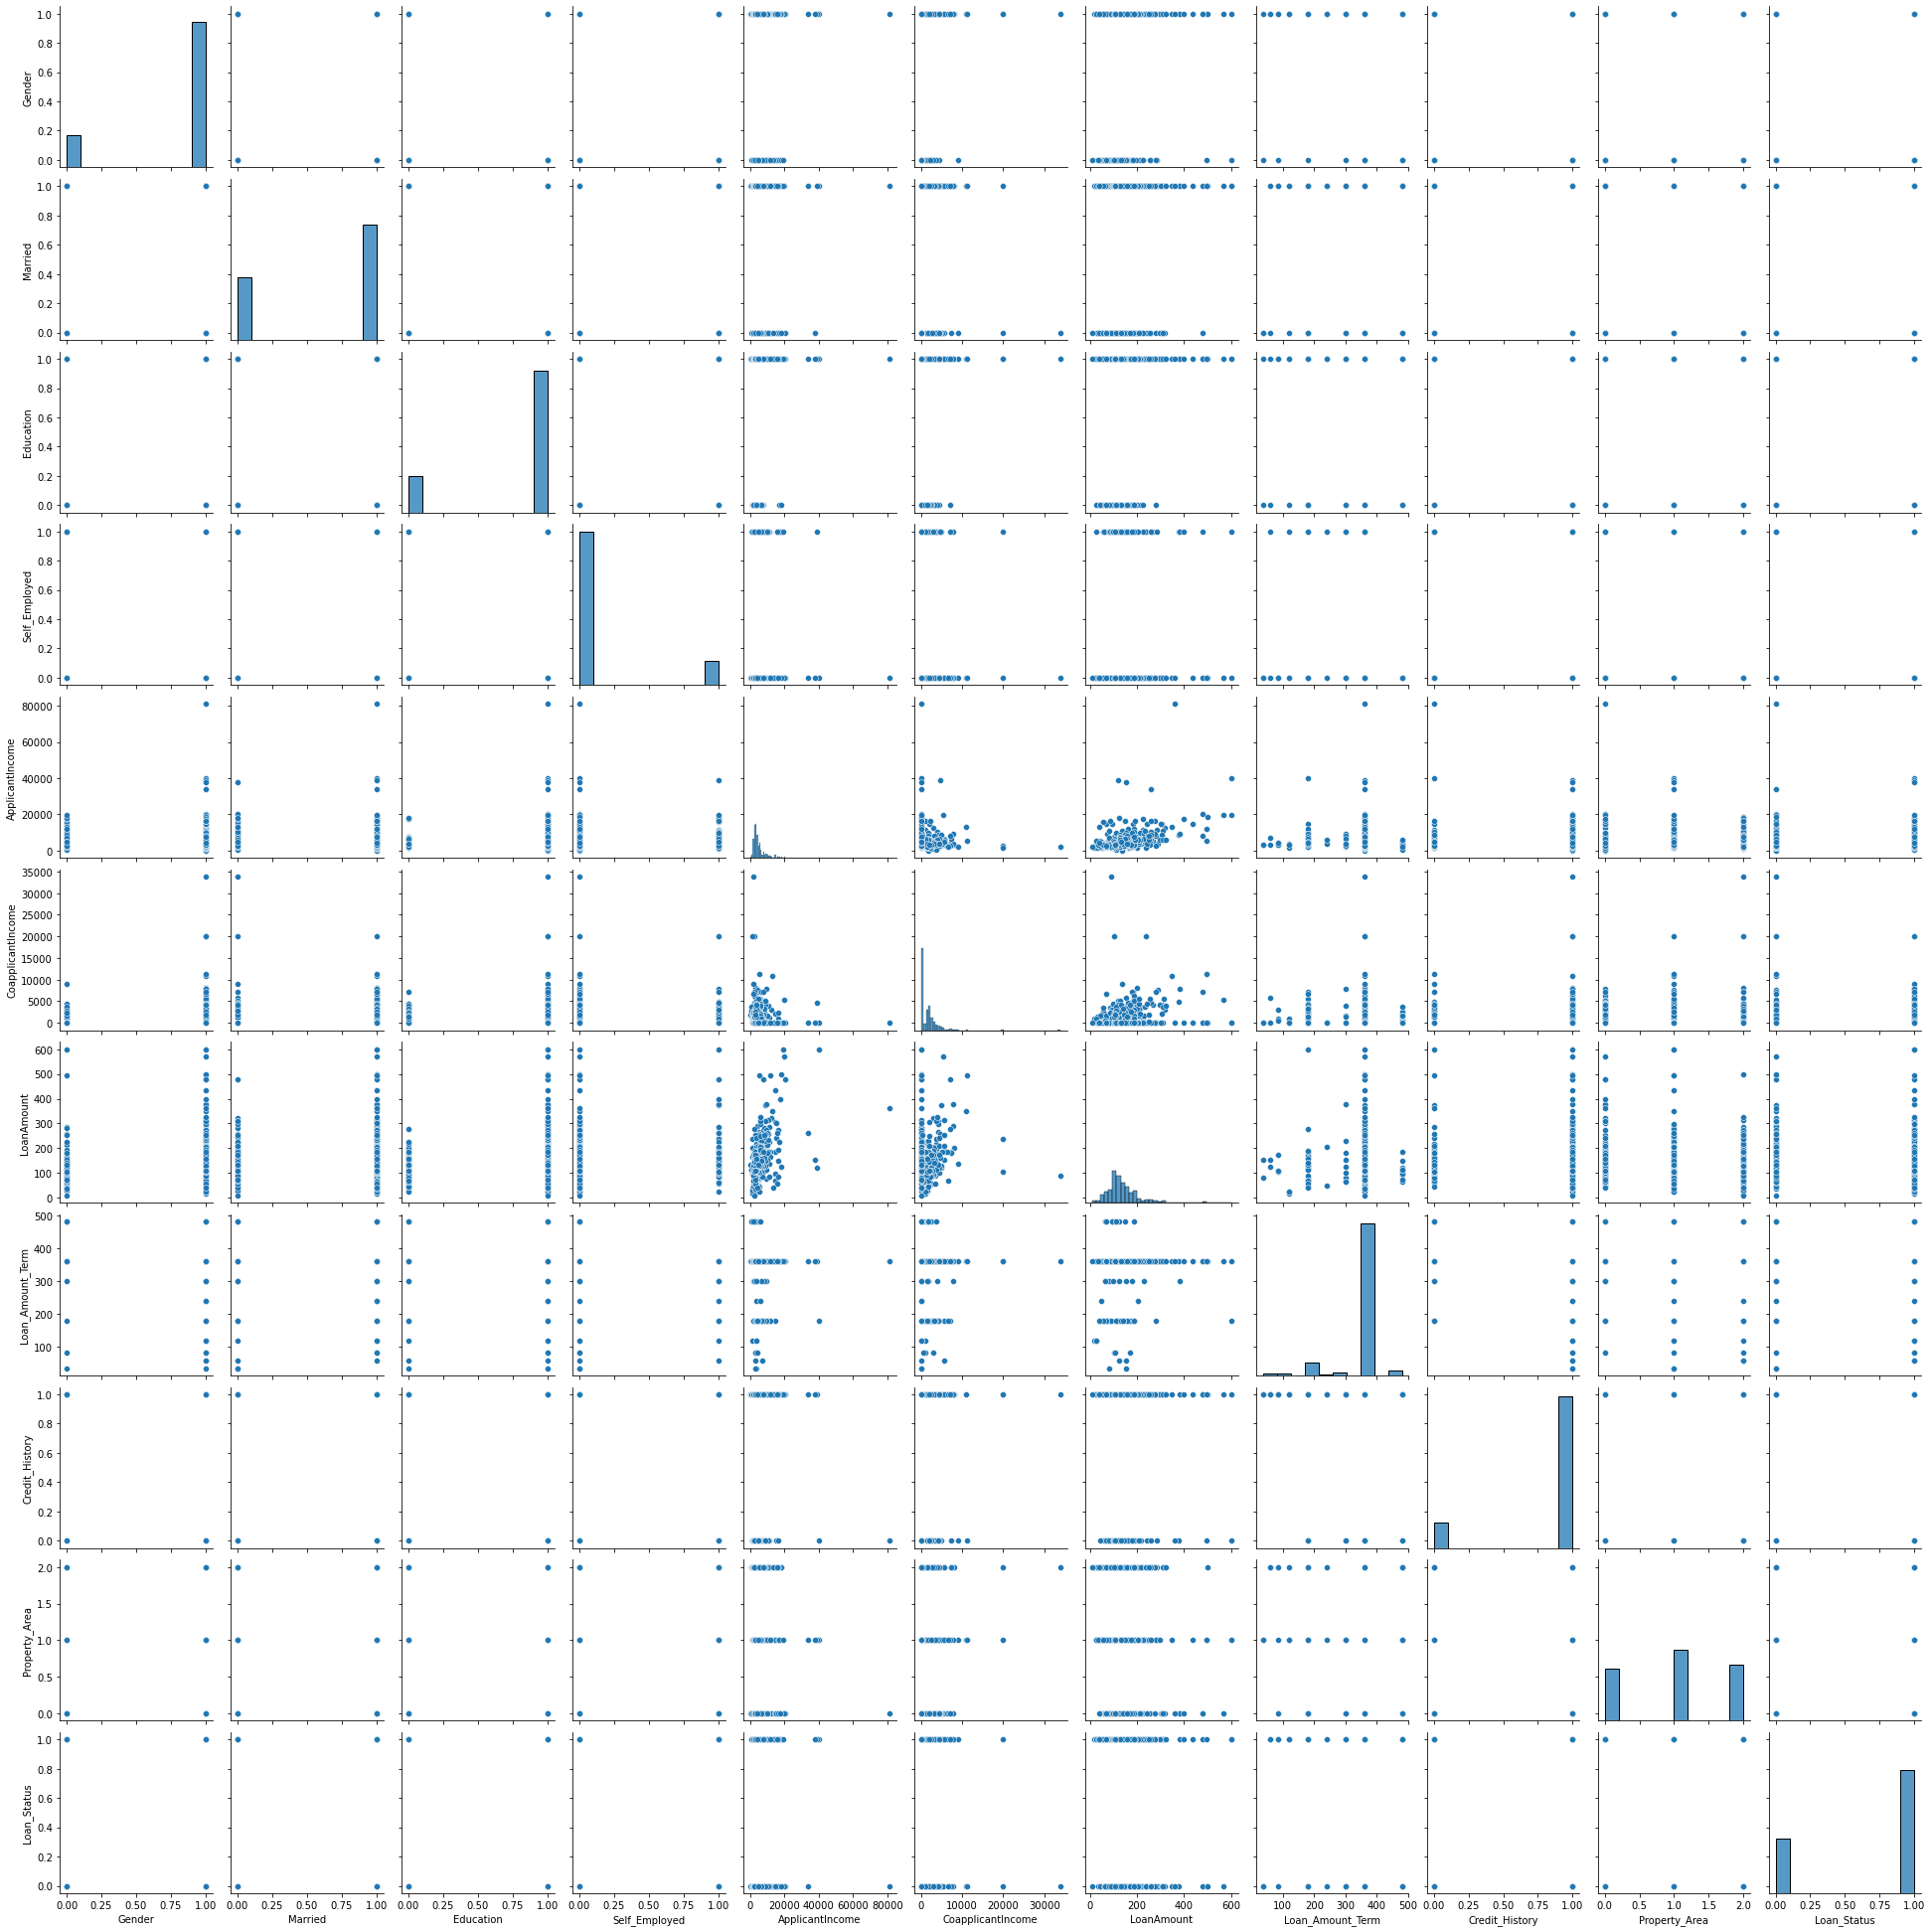

In [35]:
sns.pairplot(mydata)

# Manually Transformed data model (SVM)

In [36]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(X , target  ,  test_size= 0.1)

In [37]:
model = svm.SVC(kernel = 'linear')

In [38]:
model.fit(X_train , Y_train)

SVC(kernel='linear')

In [39]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

0.7893518518518519

In [40]:
testing_prediction_SVM = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_SVM , Y_test)
testing_accuracy

0.8541666666666666

**Using K-Folds cross validation to cross validate our model**

In [41]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, target, cv = k_folds)

In [42]:
scores

array([0.79166667, 0.73958333, 0.78125   , 0.82291667, 0.80208333])

In [43]:
score = np.array(scores)
score

array([0.79166667, 0.73958333, 0.78125   , 0.82291667, 0.80208333])

In [44]:
avg_score = (np.sum(score))/5
avg_score

0.7875

 # min_max_scalar_transformation_data Transformed data model (SVM)

In [45]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(min_max_scalar_transformation_data , target  ,  test_size= 0.1)

In [46]:
model = svm.SVC(kernel = 'linear')

In [47]:
model.fit(X_train , Y_train)

SVC(kernel='linear')

In [48]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

0.8078703703703703

In [49]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction , Y_test)
testing_accuracy

0.8125

**Using K-Folds cross validation to cross validate our model**

In [50]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, min_max_scalar_transformation_data, target, cv = k_folds)

In [51]:
scores

array([0.80208333, 0.75      , 0.79166667, 0.85416667, 0.84375   ])

In [52]:
score = np.array(scores)
score

array([0.80208333, 0.75      , 0.79166667, 0.85416667, 0.84375   ])

In [53]:
avg_score = (np.sum(score))/5
avg_score

0.8083333333333332

# unit_vector Transformed data model (SVM)

In [54]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(unit_vector , target  ,  test_size= 0.1)

In [55]:
model = svm.SVC(kernel = 'linear')

In [56]:
model.fit(X_train , Y_train)

SVC(kernel='linear')

In [57]:
training_prediction = model.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

1.0

In [58]:
testing_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction , Y_test)
testing_accuracy

1.0

**Using K-Folds cross validation to cross validate our model**

In [59]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, unit_vector, target, cv = k_folds)

In [60]:
scores

array([1., 1., 1., 1., 1.])

In [61]:
score = np.array(scores)
score

array([1., 1., 1., 1., 1.])

In [62]:
avg_score = (np.sum(score))/5
avg_score

1.0

# Manually Transformed data model (Logistic Regression)

In [63]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(X , target  ,  test_size= 0.1)

In [64]:
model_log = LogisticRegression()

In [65]:
model_log.fit(X_train , Y_train)

C:\Users\saada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
training_prediction = model_log.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

0.8055555555555556

In [67]:
testing_prediction_log = model_log.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_log , Y_test)
testing_accuracy

0.8125

**Using K-Folds cross validation to cross validate our model**

In [68]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_log, X, target, cv = k_folds)

C:\Users\saada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
scores

array([0.80208333, 0.75      , 0.80208333, 0.82291667, 0.76041667])

In [70]:
score = np.array(scores)
score

array([0.80208333, 0.75      , 0.80208333, 0.82291667, 0.76041667])

In [71]:
avg_score = (np.sum(score))/5
avg_score

0.7875

# MinMax Scaler Normalized data model (Logistic Regression)

In [72]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(min_max_scalar_transformation_data , target  ,  test_size= 0.1)

In [73]:
model_log = LogisticRegression()

In [74]:
model_log.fit(X_train , Y_train)

LogisticRegression()

In [75]:
training_prediction = model_log.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

0.8032407407407407

In [76]:
testing_prediction_log = model_log.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_log , Y_test)
testing_accuracy

0.8541666666666666

**Using K-Folds cross validation to cross validate our model**}

In [77]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_log, min_max_scalar_transformation_data, target, cv = k_folds)
scores

array([0.80208333, 0.75      , 0.79166667, 0.85416667, 0.82291667])

In [78]:
score = np.array(scores)
score

array([0.80208333, 0.75      , 0.79166667, 0.85416667, 0.82291667])

In [79]:
    avg_score = (np.sum(score))/5
avg_score

0.8041666666666666

# Unit Vector Normalized Model (Logistic Regression)


In [80]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(unit_vector , target  ,  test_size= 0.1)

In [81]:
model_log = LogisticRegression()

In [82]:
model_log.fit(X_train , Y_train)

LogisticRegression()

In [83]:
training_prediction = model_log.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

1.0

In [84]:
testing_prediction_log = model_log.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_log , Y_test)
testing_accuracy

1.0

**Using K-Folds cross validation to cross validate our model**

In [85]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_log, unit_vector, target, cv = k_folds)
scores

array([1., 1., 1., 1., 1.])

In [86]:
score = np.array(scores)
score

array([1., 1., 1., 1., 1.])

In [87]:
avg_score = (np.sum(score))/5
avg_score

1.0

# Manually Transformed data model (Decision Tree)

In [88]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(X , target  ,  test_size= 0.1)

In [89]:
model_tree = DecisionTreeClassifier()

In [90]:
model_tree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [91]:
training_prediction = model_tree.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

1.0

In [92]:
testing_prediction_tree = model_tree.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_tree , Y_test)
testing_accuracy

0.6666666666666666

**Using K-Folds cross validation to cross validate our model**

In [93]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_tree, X, target, cv = k_folds)
scores

array([0.70833333, 0.65625   , 0.75      , 0.71875   , 0.75      ])

In [94]:
score = np.array(scores)
score

array([0.70833333, 0.65625   , 0.75      , 0.71875   , 0.75      ])

In [95]:
avg_score = (np.sum(score))/5
avg_score

0.7166666666666667

# MinMax Scaler Normalized data model (Decision Tree)

In [96]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(min_max_scalar_transformation_data, target  ,  test_size= 0.1)

In [97]:
model_tree = DecisionTreeClassifier()

In [98]:
model_tree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [99]:
training_prediction = model_tree.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

1.0

In [100]:
testing_prediction_tree = model_tree.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_tree , Y_test)
testing_accuracy

0.5833333333333334

**Using K-Folds cross validation to cross validate our model**

In [101]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_tree, min_max_scalar_transformation_data, target, cv = k_folds)
scores

array([0.69791667, 0.60416667, 0.79166667, 0.73958333, 0.73958333])

In [102]:
score = np.array(scores)
score

array([0.69791667, 0.60416667, 0.79166667, 0.73958333, 0.73958333])

In [103]:
avg_score = (np.sum(score))/5
avg_score

0.7145833333333333

# Unit Vector Normalized data model (Decision Tree)

In [104]:
# Splitting the dataset into testing and training
# only 10% of the data we are using for testing
X_train , X_test , Y_train , Y_test = train_test_split(unit_vector , target  ,  test_size= 0.1)

In [105]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [106]:
training_prediction = model_tree.predict(X_train)
training_accuracy = accuracy_score(training_prediction , Y_train)
training_accuracy

1.0

In [107]:
testing_prediction_tree = model_tree.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction_tree , Y_test)
testing_accuracy

1.0

**Using K-Folds cross validation to cross validate our model**

In [108]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_tree, unit_vector, target, cv = k_folds)
scores

array([1., 1., 1., 1., 1.])

In [109]:
score = np.array(scores)
score

array([1., 1., 1., 1., 1.])

In [110]:
avg_score = (np.sum(score))/5
avg_score

1.0

# CONFUSION MATRIX (SVM)

Text(91.68, 0.5, 'Predicted Class')

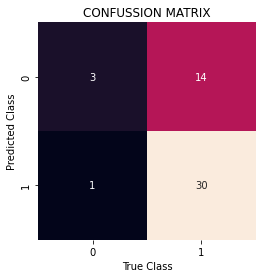

In [111]:
mat = confusion_matrix(testing_prediction_SVM , Y_test)
sns.heatmap(mat.T , square=True , annot=True , fmt = 'd' , cbar=False)
plt.title('CONFUSSION MATRIX')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

# CONFUSION MATRIX (LOGISTIC)

Text(91.68, 0.5, 'Predicted Class')

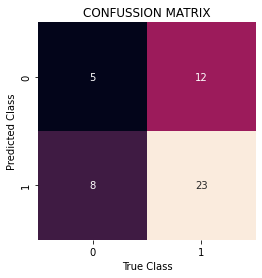

In [112]:
mat = confusion_matrix(testing_prediction_log , Y_test)
sns.heatmap(mat.T , square=True , annot=True , fmt = 'd' , cbar=False)
plt.title('CONFUSSION MATRIX')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

# CONFUSION MATRIX (Decision Tree)

Text(91.68, 0.5, 'Predicted Class')

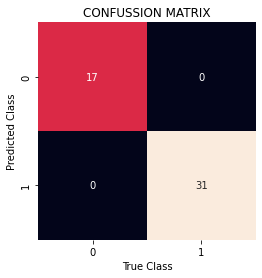

In [113]:
mat = confusion_matrix(testing_prediction_tree , Y_test)
sns.heatmap(mat.T , square=True , annot=True , fmt = 'd' , cbar=False)
plt.title('CONFUSSION MATRIX')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [114]:
mydata.shape

(480, 12)

In [115]:
mydata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Prediction

SVM

In [116]:
input_data_to_predict= (1,0,3,1,0,7000,0.0,300,360.0,1.0,0 ,1)
np_input_data = np.asarray(input_data_to_predict)
reshaped_data = np_input_data.reshape(1,-1)
predictionss = model.predict(reshaped_data)
print(predictionss)

if predictionss == 0:
    print('Loan is not allowed')
else:
    print('Loan is allowed')


[1]
Loan is allowed


Logistic Regression

In [117]:
input_data_to_predict= (1,0,3,1,0,7000,0.0,300,360.0,1.0,0 ,1)
np_input_data = np.asarray(input_data_to_predict)
reshaped_data = np_input_data.reshape(1,-1)
predictionss = model_log.predict(reshaped_data)
print(predictionss)

if predictionss == 0:
    print('Loan is not allowed')
else:
    print('Loan is allowed')


[0]
Loan is not allowed


Decision Tree

In [132]:
input_data_to_predict= (1,0,3,1,0,7000,0.0,300,360.0,1.0,0 ,1)
np_input_data = np.asarray(input_data_to_predict)
reshaped_data = np_input_data.reshape(1,-1)
predictionss = model_tree.predict(reshaped_data)
print(predictionss)

if predictionss == 0:
    print('Loan is not allowed')
else:
    print('Loan is allowed')


[1]
Loan is allowed


# SVM Classifier Performance

In [121]:
accuracy_SVM = metrics.accuracy_score(testing_prediction_SVM , Y_test)

In [123]:
precision_SVM = metrics.precision_score(testing_prediction_SVM , Y_test)

In [124]:
recall_SVM = metrics.recall_score(testing_prediction_SVM , Y_test)

In [128]:
specificity_SVM = metrics.recall_score(testing_prediction_SVM , Y_test)

In [130]:
cm1 = confusion_matrix(testing_prediction_SVM , Y_test)
sensitivity_SVM  = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [127]:
F1_score_SVM = metrics.f1_score(testing_prediction_SVM , Y_test)

f(0.5)

In [198]:
from sklearn.metrics import fbeta_score
sc1_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='macro', beta=0.5))
sc2_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='weighted', beta=0.5))
sc3_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='micro', beta=0.5))
ad_05_svm = np.add(sc1_svm , sc2_svm , sc3_svm)
avg_svm_05= ad/3

f2

In [204]:
from sklearn.metrics import fbeta_score
sc11_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='macro', beta=2))
sc22_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='weighted', beta=2))
sc33_svm = np.asarray(fbeta_score(testing_prediction_SVM , Y_test, average='micro', beta=2))
ad_2_svm = np.add(sc11_svm , sc22_svm , sc33_svm)
avg_svm_f2= ad/3

In [205]:
print("Accuracy on SVM model : " , accuracy_SVM)
print("Precision on SVM model : " , precision_SVM)
print("recall on SVM model : " , recall_SVM)
print("Specificty on SVM model : " , specificity_SVM)
print("Sensitivity on SVM model : " , sensitivity_SVM)
print("F0.5_score on SVM model : " , avg_svm_05)
print("F1_score on SVM model : " , F1_score_SVM)
print("F2_score on SVM model : " , avg_svm_f2)

Accuracy on SVM model :  0.6875
Precision on SVM model :  0.967741935483871
recall on SVM model :  0.6818181818181818
Specificty on SVM model :  0.6818181818181818
Sensitivity on SVM model :  0.75
F0.5_score on SVM model :  0.6666666666666666
F1_score on SVM model :  0.8
F2_score on SVM model :  0.6666666666666666


# Logistic Regression Classifier Performance

In [206]:
accuracy_log = metrics.accuracy_score(testing_prediction_log , Y_test )

In [207]:
precision_log = metrics.precision_score(testing_prediction_log , Y_test)

In [135]:
recall_log = metrics.recall_score(testing_prediction_log , Y_test)

In [136]:
specificity_log = metrics.recall_score(testing_prediction_log , Y_test)

In [137]:
cm2 = confusion_matrix(testing_prediction_log , Y_test)
sensitivity_log  = cm2[0,0]/(cm2[0,0]+cm2[0,1])

In [138]:
F1_score_log = metrics.f1_score(testing_prediction_log , Y_test)

f(0.5)

In [191]:
from sklearn.metrics import fbeta_score
sc1_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='macro', beta=0.5))
sc2_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='weighted', beta=0.5))
sc3_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='micro', beta=0.5))
ad_05_log = np.add(sc1_log , sc2_log , sc3_log)
avg_log_05= ad/3

f2

In [194]:
from sklearn.metrics import fbeta_score
sc11_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='macro', beta=2))
sc22_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='weighted', beta=2))
sc33_log = np.asarray(fbeta_score(testing_prediction_log , Y_test, average='micro', beta=2))
ad_f2_log = np.add(sc11_log , sc22_log , sc33_log)
avg_log_f2= ad/3

In [195]:
print("Accuracy on Logistic regression model : " , accuracy_log)
print("Precision on Logistic regression model : " , precision_log)
print("recall on Logistic regression model : " , recall_log)
print("Specificty on Logistic regression model : " , specificity_log)
print("Sensitivity on Logistic regression model : " , sensitivity_log)
print("F0.5_score on Logistic regression model : " , avg_log_05)
print("F1_score on Logistic regression model : " , F1_score_log)
print("F2_score on Logistic regression model : " , avg_log_f2)

Accuracy on Logistic regression model :  0.5833333333333334
Precision on Logistic regression model :  0.7419354838709677
recall on Logistic regression model :  0.6571428571428571
Specificty on Logistic regression model :  0.6571428571428571
Sensitivity on Logistic regression model :  0.38461538461538464
F0.5_score on Logistic regression model :  0.6666666666666666
F1_score on Logistic regression model :  0.6969696969696969
F2_score on Logistic regression model :  0.6666666666666666


# Decision Tree Classifier Performance

In [141]:
accuracy_tree = metrics.accuracy_score(testing_prediction_tree , Y_test)

In [142]:
precision_tree = metrics.precision_score(testing_prediction_tree , Y_test)

In [143]:
recall_tree = metrics.recall_score(testing_prediction_tree , Y_test)

In [144]:
specificity_tree = metrics.recall_score(testing_prediction_tree , Y_test)

In [145]:
cm3 = confusion_matrix(testing_prediction_tree , Y_test)
sensitivity_tree  = cm3[0,0]/(cm3[0,0]+cm3[0,1])

In [170]:
F1_score_tree = metrics.f1_score(testing_prediction_tree , Y_test)

f(0.5)

In [185]:
from sklearn.metrics import fbeta_score
sc1 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='macro', beta=0.5))
sc2 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='weighted', beta=0.5))
sc3 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='micro', beta=0.5))
ad_05 = np.add(sc1 , sc2 , sc3)
avg_tree_05= ad/3

f2

In [188]:
from sklearn.metrics import fbeta_score
sc11 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='macro', beta=2))
sc22 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='weighted', beta=2))
sc33 = np.asarray(fbeta_score(testing_prediction_tree , Y_test, average='micro', beta=2))
ad_f2 = np.add(sc11 , sc22 , sc33)
avg_tree_f2= ad/3

In [189]:
print("Accuracy on Decision Tree model : " , accuracy_tree)
print("Precision on Decision Tree model : " , precision_tree)
print("recall on Decision Tree model : " , recall_tree)
print("Specificty on Decision Tree model : " , specificity_tree)
print("Sensitivity on Decision Tree model : " , sensitivity_tree)
print("F0.5_score on Decision Tree model : " , avg_tree_05)
print("F1_score on Decision Tree model : " , F1_score_tree)
print("F2_score on Decision Tree model : " , avg_tree_f2)

Accuracy on Decision Tree model :  1.0
Precision on Decision Tree model :  1.0
recall on Decision Tree model :  1.0
Specificty on Decision Tree model :  1.0
Sensitivity on Decision Tree model :  1.0
F0.5_score on Decision Tree model :  0.6666666666666666
F1_score on Decision Tree model :  1.0
F2_score on Decision Tree model :  0.6666666666666666


# LineGraph

In [161]:
lr_probas = LogisticRegression().fit(X_train , Y_train).predict_proba(X_test)
rf_probas = DecisionTreeClassifier().fit(X_train , Y_train).predict_proba(X_test)
gb_probas = RandomForestClassifier().fit(X_train , Y_train).predict_proba(X_test)

probas_list = [lr_probas, rf_probas, gb_probas]
clf_names = ['Logistic Regression', 'Decision Trees', 'SVM']

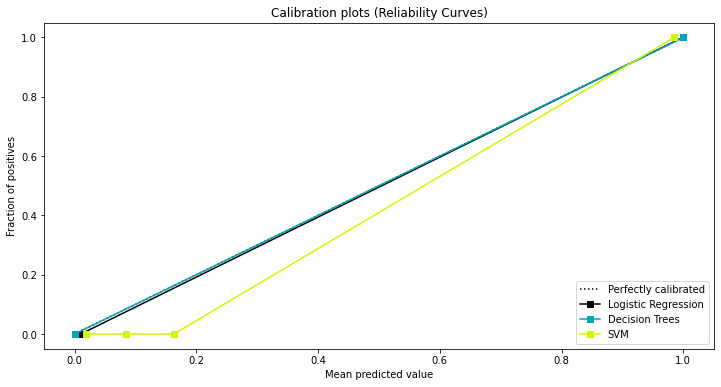

In [169]:
skplt.metrics.plot_calibration_curve(Y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );